# Model training and evaluation (static + dynamic data)

In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [2]:
df_results = pd.DataFrame()

In [3]:
# metrics for each class + weighted average (- bad impact)
# micro f1 = accuracy
def print_metrics(cls):
    global df_results
    
    predicted = cls.predict(X_test)
    sns.heatmap(metrics.confusion_matrix(y_test, predicted), annot=True, fmt='g', annot_kws={"size": 16})
    print('accuracy: ',metrics.accuracy_score(y_test, predicted))
    print()
    print(metrics.classification_report(y_test, predicted))
    print('macro precision: ',metrics.precision_score(y_test, predicted, average='macro'))
    print('micro precision: ',metrics.precision_score(y_test, predicted, average='micro'))
    print()
    print('micro recall: ',metrics.recall_score(y_test, predicted, average='micro'))
    print('macro recall: ',metrics.recall_score(y_test, predicted, average='macro'))
    print()
    print('micro f1: ',metrics.f1_score(y_test, predicted, average='micro'))
    print('macro f1: ',metrics.f1_score(y_test, predicted, average='macro'))
    
    df_result = pd.DataFrame({
        'Algoritmus': [str(cls).split('(')[0]],
        
        'Transformácia': ['áno' if transformed else 'nie'],
        
        'S': [round(metrics.accuracy_score(y_test, predicted), 2)],
        
        'P_0': [round(precision_score(y_test, cls.predict(X_test), average=None)[0], 2)],
        'P_1': [round(precision_score(y_test, cls.predict(X_test), average=None)[1], 2)],
        'P_2': [round(precision_score(y_test, cls.predict(X_test), average=None)[2], 2)],
        'P_3': [round(precision_score(y_test, cls.predict(X_test), average=None)[3], 2)],
        
        'Ú_0': [round(recall_score(y_test, cls.predict(X_test), average=None)[0], 2)],
        'Ú_1': [round(recall_score(y_test, cls.predict(X_test), average=None)[1], 2)],
        'Ú_2': [round(recall_score(y_test, cls.predict(X_test), average=None)[2], 2)],
        'Ú_3': [round(recall_score(y_test, cls.predict(X_test), average=None)[3], 2)],
        
        'F1_makro': [round(metrics.f1_score(y_test, predicted, average='macro'), 2)],
    })
        
    df_results = df_results.append(df_result, ignore_index=True)
    
    plt.show()

In [4]:
def train_eval(classifier, rand_state = False, **kwargs):
    if rand_state:
        cls = classifier(random_state=16, **kwargs)
    else:
        cls = classifier(**kwargs)
    cls.fit(X_train, y_train)
    print_metrics(cls)

## Categorical data

In [5]:
# prepare categorical features (one hot encoded)
categorical_train = pd.read_csv('data/split/transformed/train_categories.csv', index_col=0)
categorical_test = pd.read_csv('data/split/transformed/test_categories.csv', index_col=0)

In [6]:
categorical_train.shape

(18296, 60)

In [7]:
categorical_test.shape

(6099, 60)

## LSA groups

In [8]:
# prepare LSA groups
lsa_train = pd.read_csv('data/split/nlp/min_max_df/train_lsa.csv', index_col=0)
lsa_test = pd.read_csv('data/split/nlp/min_max_df/test_lsa.csv', index_col=0)

# contained in static+dynamic data
lsa_train.drop(['ratio_running_duration'], axis=1, inplace=True)
lsa_test.drop(['ratio_running_duration'], axis=1, inplace=True)

# rename columns
lsa_train.rename(columns= lambda x: 'LSA_' + str(x), inplace=True)
lsa_test.rename(columns= lambda x: 'LSA_' + str(x), inplace=True)

In [9]:
lsa_train.shape

(18296, 25)

In [10]:
lsa_test.shape

(6099, 25)

## LDA topics

In [11]:
# prepare LDA topics
lda_train = pd.read_csv('data/split/nlp/train_lda25.csv', index_col=0)
lda_test = pd.read_csv('data/split/nlp/test_lda25.csv', index_col=0)

# contained in static+dynamic data
lda_train.drop(['ratio_running_duration'], axis=1, inplace=True)
lda_test.drop(['ratio_running_duration'], axis=1, inplace=True)

# rename columns
lda_train.rename(columns= lambda x: 'LDA_' + str(x), inplace=True)
lda_test.rename(columns= lambda x: 'LDA_' + str(x), inplace=True)

In [12]:
lda_train.shape

(18296, 25)

In [13]:
lda_test.shape

(6099, 25)

## Original data (no scaling, no normalization)

In [14]:
# prepare original data 
X_train = pd.read_csv('data/split/transformed/train_original.csv', index_col=0)
X_test = pd.read_csv('data/split/transformed/test_original.csv', index_col=0)

# merge with categorical, lsa and lda
X_train = pd.concat([X_train, categorical_train, lsa_train, lda_train], axis=1)
X_test = pd.concat([X_test, categorical_test, lsa_test, lda_test], axis=1)

X_train = X_train[(X_train['ratio_running_duration'] >= 0) & (X_train['ratio_running_duration'] < 25)]
X_test = X_test[(X_test['ratio_running_duration'] >= 0) & (X_test['ratio_running_duration'] < 25)]

y_train = X_train['class']
y_test = X_test['class']

X_train.drop('class', axis=1, inplace=True)
X_test.drop('class', axis=1, inplace=True)

In [15]:
X_train.shape

(4713, 151)

In [16]:
X_test.shape

(1571, 151)

In [17]:
X_train.info(max_cols=200)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4713 entries, 0 to 4712
Data columns (total 151 columns):
average_pledge                           4713 non-null float64
backers_count                            4713 non-null int64
category_position                        4713 non-null int64
days_duration                            4713 non-null int64
days_preparation                         4713 non-null int64
days_remaining                           4713 non-null int64
days_running                             4713 non-null int64
db_duration                              4713 non-null int64
goal                                     4713 non-null float64
pledged                                  4713 non-null float64
ratio_pledged_goal                       4713 non-null float64
ratio_running_duration                   4713 non-null float64
staff_pick                               4713 non-null int64
usd_goal                                 4713 non-null int64
usd_pledged                 

In [18]:
transformed = False

## Classifiers

accuracy:  0.557606619987

             precision    recall  f1-score   support

          1       0.80      0.69      0.74       655
          2       0.25      0.26      0.26       202
          3       0.42      0.46      0.44       379
          4       0.53      0.59      0.56       335

avg / total       0.58      0.56      0.57      1571

macro precision:  0.497712194268
micro precision:  0.557606619987

micro recall:  0.557606619987
macro recall:  0.499903794342

micro f1:  0.557606619987
macro f1:  0.4971417699


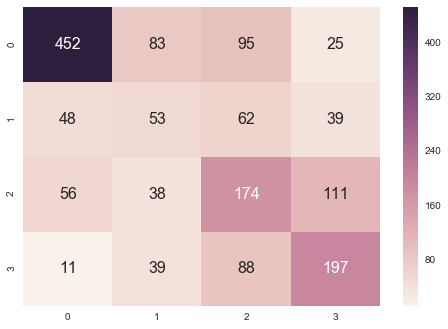

In [19]:
from sklearn.naive_bayes import BernoulliNB
train_eval(BernoulliNB)

accuracy:  0.657542966264

             precision    recall  f1-score   support

          1       0.86      0.86      0.86       655
          2       0.33      0.35      0.34       202
          3       0.50      0.49      0.50       379
          4       0.66      0.64      0.65       335

avg / total       0.66      0.66      0.66      1571

macro precision:  0.585180536076
micro precision:  0.657542966264

micro recall:  0.657542966264
macro recall:  0.585132478603

micro f1:  0.657542966264
macro f1:  0.585028819523


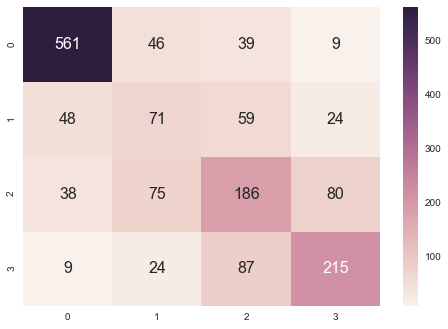

In [20]:
from sklearn.tree import DecisionTreeClassifier
train_eval(DecisionTreeClassifier, True)

accuracy:  0.497772119669

             precision    recall  f1-score   support

          1       0.70      0.70      0.70       655
          2       0.21      0.23      0.22       202
          3       0.36      0.35      0.35       379
          4       0.44      0.42      0.43       335

avg / total       0.50      0.50      0.50      1571

macro precision:  0.427884354348
micro precision:  0.497772119669

micro recall:  0.497772119669
macro recall:  0.427163904664

micro f1:  0.497772119669
macro f1:  0.42729085659


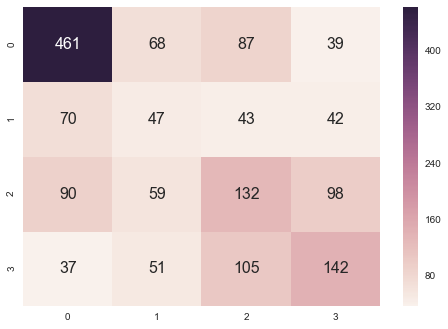

In [21]:
from sklearn.tree import ExtraTreeClassifier
train_eval(ExtraTreeClassifier, True)

accuracy:  0.620623806493

             precision    recall  f1-score   support

          1       0.71      0.93      0.81       655
          2       0.24      0.13      0.17       202
          3       0.50      0.40      0.44       379
          4       0.62      0.56      0.59       335

avg / total       0.58      0.62      0.59      1571

macro precision:  0.518615477037
micro precision:  0.620623806493

micro recall:  0.620623806493
macro recall:  0.504754189022

micro f1:  0.620623806493
macro f1:  0.502064452507


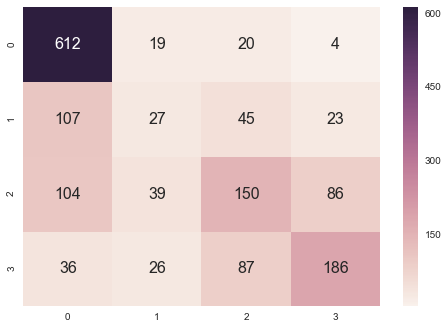

In [22]:
from sklearn.ensemble import ExtraTreesClassifier
train_eval(ExtraTreesClassifier, True)

accuracy:  0.332908975175

             precision    recall  f1-score   support

          1       0.99      0.12      0.22       655
          2       0.14      0.15      0.14       202
          3       0.29      0.90      0.44       379
          4       0.85      0.21      0.34       335

avg / total       0.68      0.33      0.29      1571

macro precision:  0.564895238085
micro precision:  0.332908975175

micro recall:  0.332908975175
macro recall:  0.346241806189

micro f1:  0.332908975175
macro f1:  0.283961783554


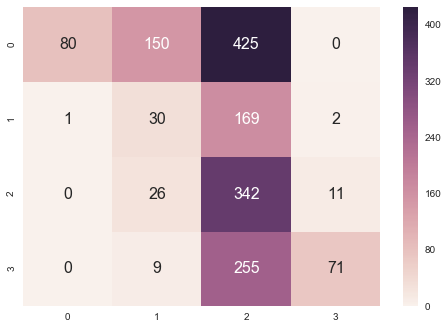

In [23]:
from sklearn.naive_bayes import GaussianNB
train_eval(GaussianNB)

accuracy:  0.661362189688

             precision    recall  f1-score   support

          1       0.79      0.95      0.86       655
          2       0.27      0.21      0.24       202
          3       0.52      0.46      0.48       379
          4       0.70      0.60      0.65       335

avg / total       0.64      0.66      0.64      1571

macro precision:  0.568835286962
micro precision:  0.661362189688

micro recall:  0.661362189688
macro recall:  0.555103086189

micro f1:  0.661362189688
macro f1:  0.557774905863


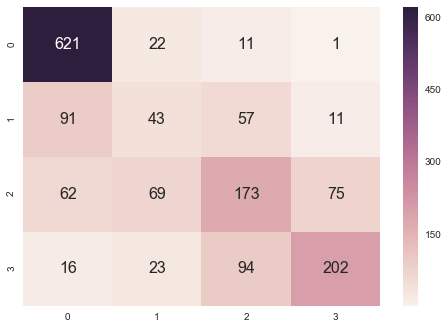

In [24]:
from sklearn.neighbors import KNeighborsClassifier
train_eval(KNeighborsClassifier)

C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


accuracy:  0.602164226607

             precision    recall  f1-score   support

          1       0.64      0.87      0.74       655
          2       0.22      0.09      0.13       202
          3       0.49      0.46      0.47       379
          4       0.76      0.54      0.63       335

avg / total       0.58      0.60      0.57      1571

macro precision:  0.527853663929
micro precision:  0.602164226607

micro recall:  0.602164226607
macro recall:  0.491772452681

micro f1:  0.602164226607
macro f1:  0.49421555564


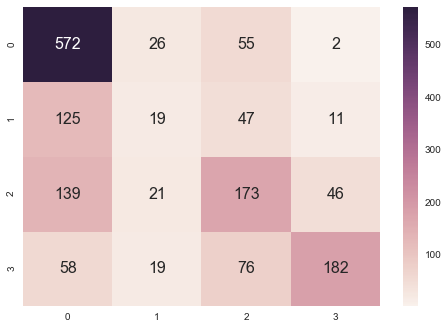

In [25]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
train_eval(LinearDiscriminantAnalysis)

In [26]:
#from sklearn.svm import LinearSVC
#train_eval(LinearSVC, True, multi_class='crammer_singer')

C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


accuracy:  0.75238701464

             precision    recall  f1-score   support

          1       0.84      0.97      0.90       655
          2       0.53      0.32      0.40       202
          3       0.63      0.66      0.64       379
          4       0.79      0.69      0.74       335

avg / total       0.74      0.75      0.74      1571

macro precision:  0.696996574464
micro precision:  0.75238701464

micro recall:  0.75238701464
macro recall:  0.660575985624

micro f1:  0.75238701464
macro f1:  0.670350449052


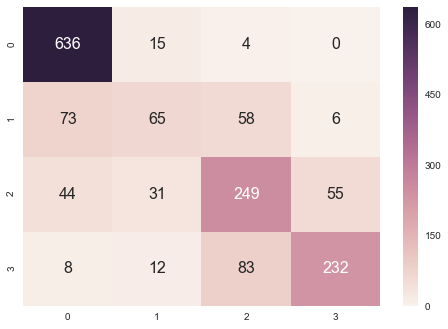

In [27]:
from sklearn.linear_model import LogisticRegression
train_eval(LogisticRegression, True, multi_class='multinomial', solver='newton-cg')

accuracy:  0.691915977085

             precision    recall  f1-score   support

          1       0.74      0.98      0.84       655
          2       0.54      0.11      0.18       202
          3       0.56      0.55      0.55       379
          4       0.75      0.64      0.69       335

avg / total       0.67      0.69      0.66      1571

macro precision:  0.646013313684
micro precision:  0.691915977085

micro recall:  0.691915977085
macro recall:  0.570003456182

micro f1:  0.691915977085
macro f1:  0.567163709919


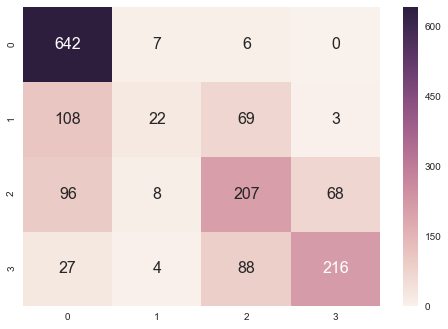

In [28]:
from sklearn.linear_model import LogisticRegressionCV
train_eval(LogisticRegressionCV, True, multi_class='multinomial')

accuracy:  0.640356460853

             precision    recall  f1-score   support

          1       0.86      0.91      0.88       655
          2       0.30      0.28      0.29       202
          3       0.56      0.21      0.30       379
          4       0.51      0.83      0.63       335

avg / total       0.64      0.64      0.61      1571

macro precision:  0.554840972799
micro precision:  0.640356460853

micro recall:  0.640356460853
macro recall:  0.55570766817

micro f1:  0.640356460853
macro f1:  0.525683028712


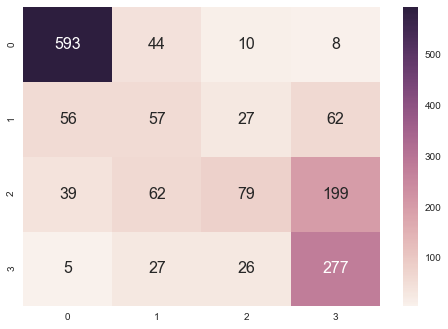

In [29]:
from sklearn.neural_network import MLPClassifier
train_eval(MLPClassifier, True)

accuracy:  0.319541693189

             precision    recall  f1-score   support

          1       0.87      0.13      0.22       655
          2       0.14      0.24      0.17       202
          3       0.29      0.81      0.43       379
          4       0.89      0.19      0.31       335

avg / total       0.64      0.32      0.28      1571

macro precision:  0.547724792401
micro precision:  0.319541693189

micro recall:  0.319541693189
macro recall:  0.341844475349

micro f1:  0.319541693189
macro f1:  0.2843087901


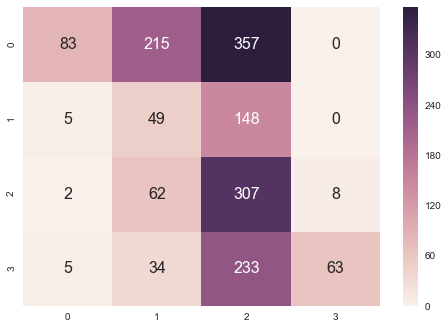

In [30]:
from sklearn.neighbors import NearestCentroid
train_eval(NearestCentroid)

C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


accuracy:  0.252068746022

             precision    recall  f1-score   support

          1       0.86      0.05      0.09       655
          2       0.15      0.91      0.25       202
          3       0.30      0.05      0.09       379
          4       0.73      0.48      0.58       335

avg / total       0.61      0.25      0.22      1571

macro precision:  0.510350458073
micro precision:  0.252068746022

micro recall:  0.252068746022
macro recall:  0.372532109947

micro f1:  0.252068746022
macro f1:  0.253395519939


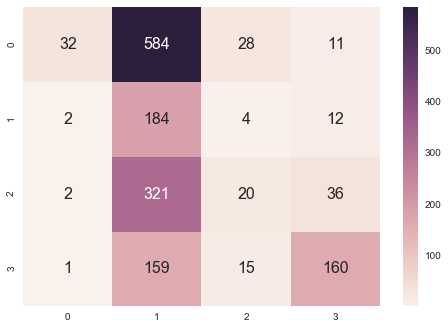

In [31]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
train_eval(QuadraticDiscriminantAnalysis)

In [32]:
#from sklearn.neighbors import RadiusNeighborsClassifier
#train_eval(RadiusNeighborsClassifier)

accuracy:  0.683004455761

             precision    recall  f1-score   support

          1       0.82      0.96      0.88       655
          2       0.31      0.22      0.26       202
          3       0.54      0.50      0.52       379
          4       0.69      0.62      0.65       335

avg / total       0.66      0.68      0.67      1571

macro precision:  0.5878458943
micro precision:  0.683004455761

micro recall:  0.683004455761
macro recall:  0.576491376586

micro f1:  0.683004455761
macro f1:  0.578257645959


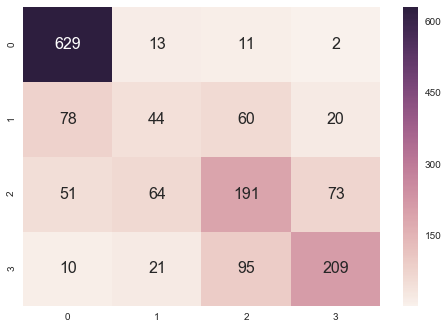

In [33]:
from sklearn.ensemble import RandomForestClassifier
train_eval(RandomForestClassifier, True)

C:\Users\Patrik\Anaconda3\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.092457937543221e-17 / 1.1102230246251565e-16
  RuntimeWarning)


accuracy:  0.600254614895

             precision    recall  f1-score   support

          1       0.60      0.93      0.73       655
          2       0.44      0.03      0.06       202
          3       0.52      0.34      0.41       379
          4       0.69      0.60      0.64       335

avg / total       0.58      0.60      0.55      1571

macro precision:  0.56136066446
micro precision:  0.600254614895

micro recall:  0.600254614895
macro recall:  0.474688835278

micro f1:  0.600254614895
macro f1:  0.460410094387


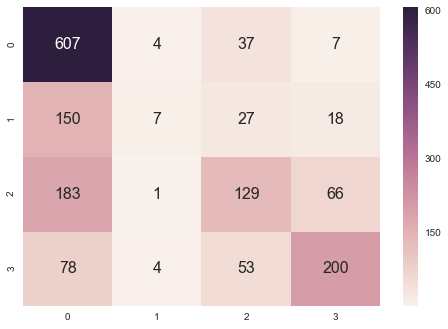

In [34]:
from sklearn.linear_model import RidgeClassifier
train_eval(RidgeClassifier, True)

accuracy:  0.605983450032

             precision    recall  f1-score   support

          1       0.62      0.91      0.74       655
          2       0.32      0.03      0.05       202
          3       0.51      0.37      0.43       379
          4       0.66      0.63      0.64       335

avg / total       0.56      0.61      0.56      1571

macro precision:  0.52696778486
micro precision:  0.605983450032

micro recall:  0.605983450032
macro recall:  0.484527263911

micro f1:  0.605983450032
macro f1:  0.466634492609


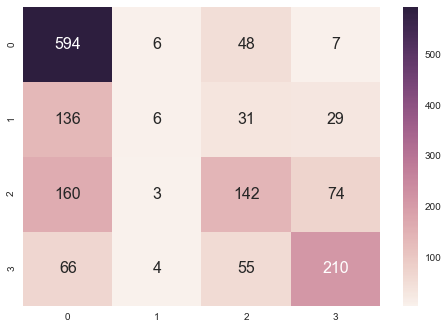

In [35]:
from sklearn.linear_model import RidgeClassifierCV
train_eval(RidgeClassifierCV)

### 1v1

accuracy:  0.416931890516

             precision    recall  f1-score   support

          1       0.42      1.00      0.59       655
          2       0.00      0.00      0.00       202
          3       0.00      0.00      0.00       379
          4       0.00      0.00      0.00       335

avg / total       0.17      0.42      0.25      1571

macro precision:  0.104299363057
micro precision:  0.416931890516

micro recall:  0.416931890516
macro recall:  0.25

micro f1:  0.416931890516
macro f1:  0.147191011236


C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Patrik\Anaconda3\lib\site-pa

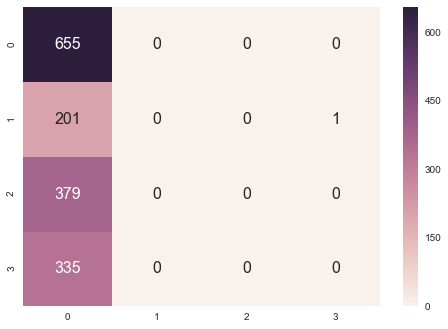

In [36]:
from sklearn.svm import NuSVC
train_eval(NuSVC, True, nu=0.1)

accuracy:  0.416931890516

             precision    recall  f1-score   support

          1       0.42      1.00      0.59       655
          2       0.00      0.00      0.00       202
          3       0.00      0.00      0.00       379
          4       0.00      0.00      0.00       335

avg / total       0.17      0.42      0.25      1571

macro precision:  0.104299363057
micro precision:  0.416931890516

micro recall:  0.416931890516
macro recall:  0.25

micro f1:  0.416931890516
macro f1:  0.147191011236


C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Patrik\Anaconda3\lib\site-pa

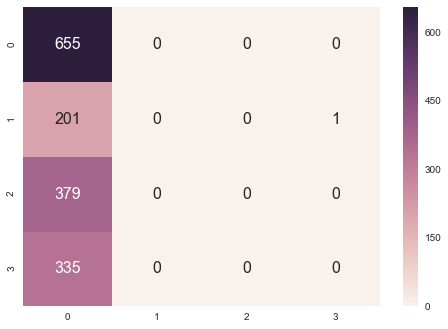

In [37]:
from sklearn.svm import SVC
train_eval(SVC, True)

accuracy:  0.416931890516

             precision    recall  f1-score   support

          1       0.43      0.96      0.59       655
          2       0.10      0.02      0.03       202
          3       0.32      0.02      0.04       379
          4       0.46      0.04      0.07       335

avg / total       0.37      0.42      0.27      1571

macro precision:  0.325926209559
micro precision:  0.416931890516

micro recall:  0.416931890516
macro recall:  0.260022458441

micro f1:  0.416931890516
macro f1:  0.182631946547


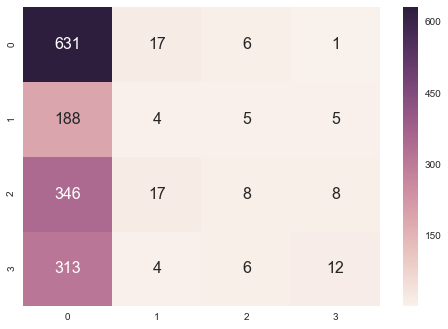

In [38]:
from sklearn.gaussian_process import GaussianProcessClassifier
train_eval(GaussianProcessClassifier, True, multi_class='one_vs_one')

### 1vAll

accuracy:  0.744112030554

             precision    recall  f1-score   support

          1       0.86      0.96      0.91       655
          2       0.51      0.41      0.46       202
          3       0.61      0.60      0.61       379
          4       0.76      0.67      0.72       335

avg / total       0.73      0.74      0.74      1571

macro precision:  0.685384852332
micro precision:  0.744112030554

micro recall:  0.744112030554
macro recall:  0.663274592323

micro f1:  0.744112030554
macro f1:  0.671438167837


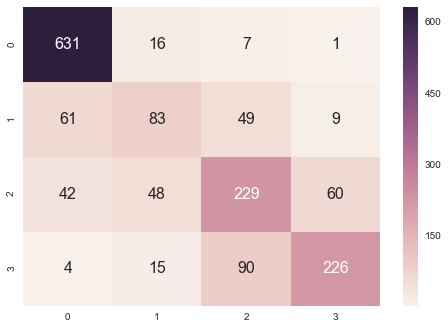

In [39]:
from sklearn.ensemble import GradientBoostingClassifier
train_eval(GradientBoostingClassifier, True)

In [40]:
#from sklearn.gaussian_process import GaussianProcessClassifier
#train_eval(GaussianProcessClassifier, True)

accuracy:  0.159770846595

             precision    recall  f1-score   support

          1       0.67      0.01      0.01       655
          2       0.13      1.00      0.24       202
          3       0.00      0.00      0.00       379
          4       1.00      0.14      0.24       335

avg / total       0.51      0.16      0.09      1571

macro precision:  0.449988947834
micro precision:  0.159770846595

micro recall:  0.159770846595
macro recall:  0.284617452004

micro f1:  0.159770846595
macro f1:  0.122165102501


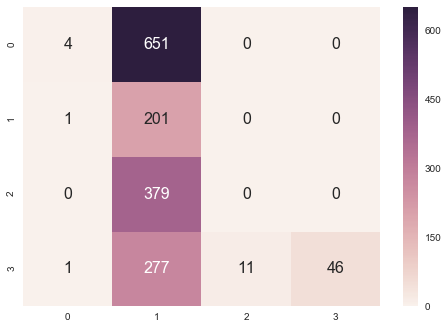

In [41]:
from sklearn.svm import LinearSVC
train_eval(LinearSVC, True, multi_class='ovr')

In [42]:
#from sklearn.linear_model import LogisticRegression
#train_eval(LogisticRegression, True, multi_class='ovr')

In [43]:
#from sklearn.linear_model import LogisticRegressionCV
#train_eval(LogisticRegressionCV, True, multi_class='ovr')

C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


accuracy:  0.524506683641

             precision    recall  f1-score   support

          1       0.94      0.48      0.63       655
          2       0.00      0.00      0.00       202
          3       0.31      0.73      0.43       379
          4       0.69      0.70      0.70       335

avg / total       0.61      0.52      0.52      1571

macro precision:  0.48485176109
micro precision:  0.524506683641

micro recall:  0.524506683641
macro recall:  0.476983468727

micro f1:  0.524506683641
macro f1:  0.440618292733


C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Patrik\Anaconda3\lib\site-pa

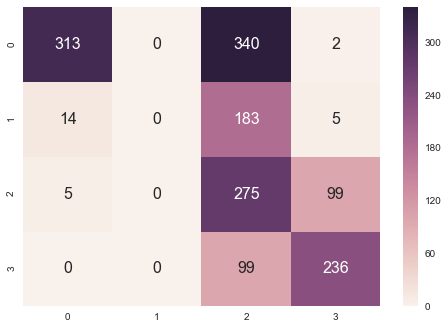

In [44]:
from sklearn.linear_model import SGDClassifier
train_eval(SGDClassifier, True)

C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


accuracy:  0.524506683641

             precision    recall  f1-score   support

          1       0.94      0.48      0.63       655
          2       0.00      0.00      0.00       202
          3       0.31      0.73      0.43       379
          4       0.69      0.70      0.70       335

avg / total       0.61      0.52      0.52      1571

macro precision:  0.48485176109
micro precision:  0.524506683641

micro recall:  0.524506683641
macro recall:  0.476983468727

micro f1:  0.524506683641
macro f1:  0.440618292733


C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Patrik\Anaconda3\lib\site-pa

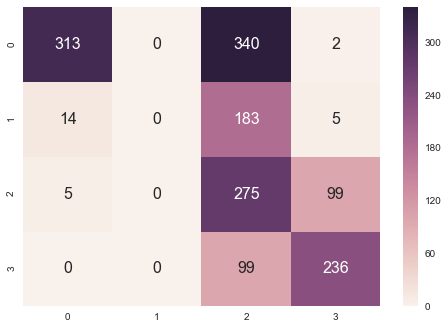

In [45]:
from sklearn.linear_model import Perceptron
train_eval(Perceptron, True)

C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.passive_aggressive.PassiveAggressiveClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


accuracy:  0.628262253342

             precision    recall  f1-score   support

          1       0.84      0.94      0.88       655
          2       0.00      0.00      0.00       202
          3       0.44      0.25      0.32       379
          4       0.45      0.83      0.58       335

avg / total       0.55      0.63      0.57      1571

macro precision:  0.431043738787
micro precision:  0.628262253342

micro recall:  0.628262253342
macro recall:  0.504756690475

micro f1:  0.628262253342
macro f1:  0.446797830274


C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Patrik\Anaconda3\lib\site-pa

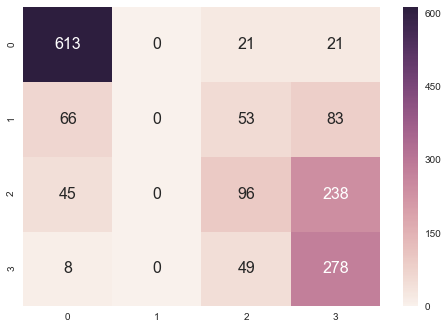

In [46]:
from sklearn.linear_model import PassiveAggressiveClassifier
train_eval(PassiveAggressiveClassifier, True)

### Results

In [47]:
df_results[['Algoritmus','Transformácia','S','P_0','P_1','P_2','P_3','Ú_0','Ú_1','Ú_2','Ú_3', 'F1_makro']].sort_values(by=['Algoritmus', 'Transformácia'])

,Algoritmus,Transformácia,S,P_0,P_1,P_2,P_3,Ú_0,Ú_1,Ú_2,Ú_3,F1_makro
0,BernoulliNB,nie,0.56,0.80,0.25,0.42,0.53,0.69,0.26,0.46,0.59,0.50
1,DecisionTreeClassifier,nie,0.66,0.86,0.33,0.50,0.66,0.86,0.35,0.49,0.64,0.59
2,ExtraTreeClassifier,nie,0.50,0.70,0.21,0.36,0.44,0.70,0.23,0.35,0.42,0.43
3,ExtraTreesClassifier,nie,0.62,0.71,0.24,0.50,0.62,0.93,0.13,0.40,0.56,0.50
4,GaussianNB,nie,0.33,0.99,0.14,0.29,0.85,0.12,0.15,0.90,0.21,0.28
17,GaussianProcessClassifier,nie,0.42,0.43,0.10,0.32,0.46,0.96,0.02,0.02,0.04,0.18
18,GradientBoostingClassifier,nie,0.74,0.86,0.51,0.61,0.76,0.96,0.41,0.60,0.67,0.67
5,KNeighborsClassifier,nie,0.66,0.79,0.27,0.52,0.70,0.95,0.21,0.46,0.60,0.56
6,LinearDiscriminantAnalysis,nie,0.60,0.64,0.22,0.49,0.76,0.87,0.09,0.46,0.54,0.49
19,LinearSVC,nie,0.16,0.67,0.13,0.00,1.00,0.01,1.00,0.00,0.14,0.12


## Transformed data (RobustScaler + Box-cox)

In [48]:
# prepare transformed data 
X_train = pd.read_csv('data/split/transformed/train.csv', index_col=0)
X_test = pd.read_csv('data/split/transformed/test.csv', index_col=0)

# merge with categorical, lsa and lda
X_train = pd.concat([X_train, categorical_train, lsa_train, lda_train], axis=1)
X_test = pd.concat([X_test, categorical_test, lsa_test, lda_test], axis=1)

X_train = X_train[(X_train['ratio_running_duration_original'] >= 0) & (X_train['ratio_running_duration_original'] < 25)]
X_test = X_test[(X_test['ratio_running_duration_original'] >= 0) & (X_test['ratio_running_duration_original'] < 25)]

y_train = X_train['class']
y_test = X_test['class']

X_train.drop(['class', 'ratio_running_duration_original'], axis=1, inplace=True)
X_test.drop(['class', 'ratio_running_duration_original'], axis=1, inplace=True)

In [49]:
X_train.shape

(4713, 151)

In [50]:
X_test.shape

(1571, 151)

In [51]:
X_train.info(max_cols=200)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4713 entries, 0 to 4712
Data columns (total 151 columns):
average_pledge                           4713 non-null float64
backers_count                            4713 non-null float64
category_position                        4713 non-null float64
days_duration                            4713 non-null float64
days_preparation                         4713 non-null float64
days_remaining                           4713 non-null float64
days_running                             4713 non-null float64
db_duration                              4713 non-null float64
goal                                     4713 non-null float64
pledged                                  4713 non-null float64
ratio_pledged_goal                       4713 non-null float64
ratio_running_duration                   4713 non-null float64
staff_pick                               4713 non-null float64
usd_goal                                 4713 non-null float64
usd_pledge

In [52]:
transformed = True

## Classifiers

accuracy:  0.558243157225

             precision    recall  f1-score   support

          1       0.79      0.69      0.74       655
          2       0.25      0.27      0.26       202
          3       0.42      0.46      0.44       379
          4       0.53      0.60      0.56       335

avg / total       0.58      0.56      0.57      1571

macro precision:  0.498908960926
micro precision:  0.558243157225

micro recall:  0.558243157225
macro recall:  0.501957234689

micro f1:  0.558243157225
macro f1:  0.498784278411


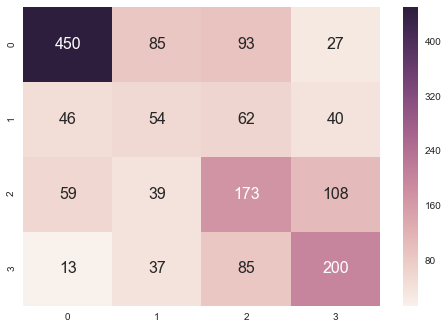

In [53]:
from sklearn.naive_bayes import BernoulliNB
train_eval(BernoulliNB)

accuracy:  0.661998726926

             precision    recall  f1-score   support

          1       0.85      0.85      0.85       655
          2       0.32      0.35      0.33       202
          3       0.52      0.49      0.50       379
          4       0.67      0.67      0.67       335

avg / total       0.66      0.66      0.66      1571

macro precision:  0.590248913989
micro precision:  0.661998726926

micro recall:  0.661998726926
macro recall:  0.590720948468

micro f1:  0.661998726926
macro f1:  0.590199926673


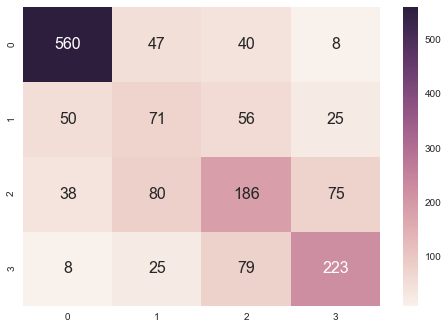

In [54]:
from sklearn.tree import DecisionTreeClassifier
train_eval(DecisionTreeClassifier, True)

accuracy:  0.588796944621

             precision    recall  f1-score   support

          1       0.80      0.85      0.82       655
          2       0.24      0.26      0.25       202
          3       0.43      0.36      0.39       379
          4       0.53      0.54      0.53       335

avg / total       0.58      0.59      0.58      1571

macro precision:  0.499986255186
micro precision:  0.588796944621

micro recall:  0.588796944621
macro recall:  0.501545878668

micro f1:  0.588796944621
macro f1:  0.499828900639


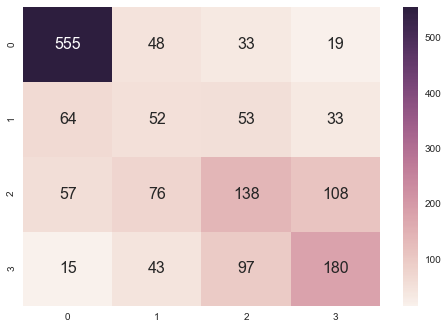

In [55]:
from sklearn.tree import ExtraTreeClassifier
train_eval(ExtraTreeClassifier, True)

accuracy:  0.674729471674

             precision    recall  f1-score   support

          1       0.82      0.96      0.88       655
          2       0.35      0.21      0.26       202
          3       0.51      0.47      0.49       379
          4       0.64      0.63      0.63       335

avg / total       0.65      0.67      0.66      1571

macro precision:  0.579285286153
micro precision:  0.674729471674

micro recall:  0.674729471674
macro recall:  0.567980726027

micro f1:  0.674729471674
macro f1:  0.568003357764


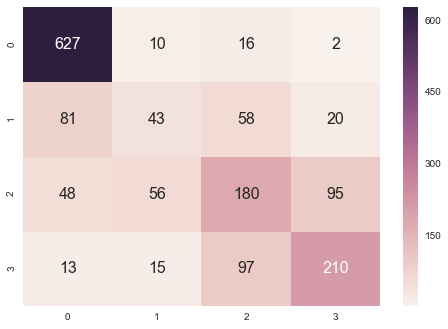

In [56]:
from sklearn.ensemble import ExtraTreesClassifier
train_eval(ExtraTreesClassifier, True)

accuracy:  0.338637810312

             precision    recall  f1-score   support

          1       0.89      0.28      0.43       655
          2       0.16      0.89      0.28       202
          3       0.48      0.06      0.11       379
          4       0.64      0.43      0.51       335

avg / total       0.65      0.34      0.35      1571

macro precision:  0.543734140011
micro precision:  0.338637810312

micro recall:  0.338637810312
macro recall:  0.415161210403

micro f1:  0.338637810312
macro f1:  0.332364049389


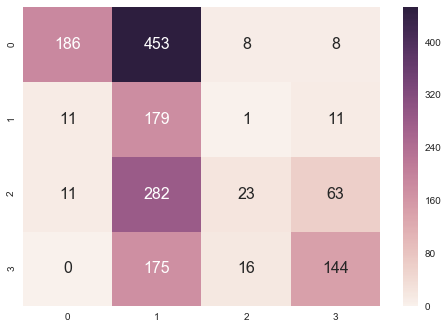

In [57]:
from sklearn.naive_bayes import GaussianNB
train_eval(GaussianNB)

accuracy:  0.502864417568

             precision    recall  f1-score   support

          1       0.58      0.82      0.68       655
          2       0.16      0.11      0.13       202
          3       0.38      0.30      0.34       379
          4       0.56      0.34      0.43       335

avg / total       0.47      0.50      0.47      1571

macro precision:  0.421264040632
micro precision:  0.502864417568

micro recall:  0.502864417568
macro recall:  0.394827642689

micro f1:  0.502864417568
macro f1:  0.394179894772


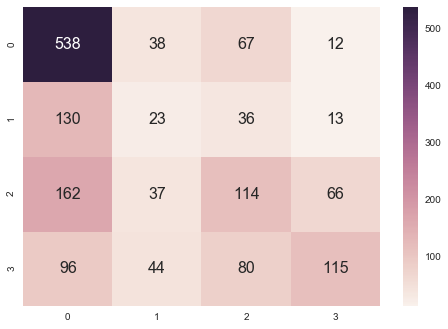

In [58]:
from sklearn.neighbors import KNeighborsClassifier
train_eval(KNeighborsClassifier)

C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


accuracy:  0.704010184596

             precision    recall  f1-score   support

          1       0.85      0.90      0.87       655
          2       0.39      0.47      0.42       202
          3       0.64      0.46      0.53       379
          4       0.69      0.74      0.71       335

avg / total       0.70      0.70      0.70      1571

macro precision:  0.640309850553
micro precision:  0.704010184596

micro recall:  0.704010184596
macro recall:  0.641742415085

micro f1:  0.704010184596
macro f1:  0.636181574953


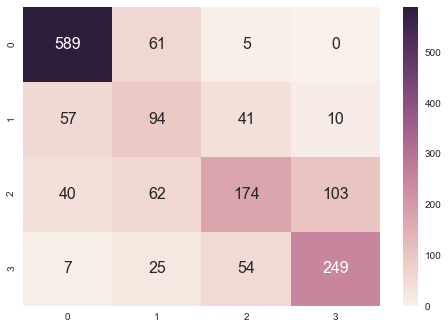

In [59]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
train_eval(LinearDiscriminantAnalysis)

In [60]:
#from sklearn.svm import LinearSVC
#train_eval(LinearSVC, True, multi_class='crammer_singer')

accuracy:  0.730744748568

             precision    recall  f1-score   support

          1       0.83      0.95      0.89       655
          2       0.51      0.31      0.38       202
          3       0.61      0.56      0.58       379
          4       0.70      0.75      0.73       335

avg / total       0.71      0.73      0.72      1571

macro precision:  0.664930856925
micro precision:  0.730744748568

micro recall:  0.730744748568
macro recall:  0.642038643567

micro f1:  0.730744748568
macro f1:  0.645846947858


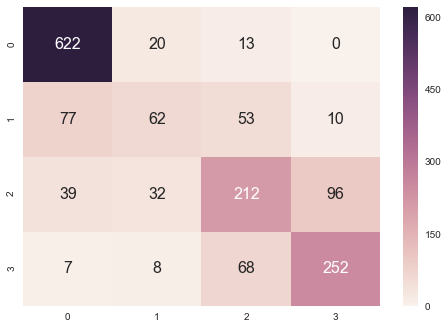

In [61]:
from sklearn.linear_model import LogisticRegression
train_eval(LogisticRegression, True, multi_class='multinomial', solver='newton-cg')

accuracy:  0.739656269892

             precision    recall  f1-score   support

          1       0.85      0.94      0.89       655
          2       0.50      0.37      0.42       202
          3       0.63      0.58      0.60       379
          4       0.73      0.75      0.74       335

avg / total       0.72      0.74      0.73      1571

macro precision:  0.6760024362
micro precision:  0.739656269892

micro recall:  0.739656269892
macro recall:  0.6591479187

micro f1:  0.739656269892
macro f1:  0.664076392939


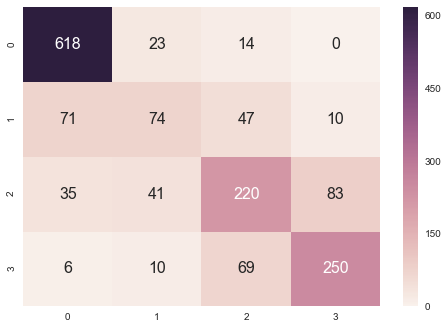

In [62]:
from sklearn.linear_model import LogisticRegressionCV
train_eval(LogisticRegressionCV, True, multi_class='multinomial')

accuracy:  0.718014003819

             precision    recall  f1-score   support

          1       0.84      0.93      0.88       655
          2       0.43      0.39      0.41       202
          3       0.61      0.58      0.59       379
          4       0.74      0.67      0.70       335

avg / total       0.71      0.72      0.71      1571

macro precision:  0.653252646802
micro precision:  0.718014003819

micro recall:  0.718014003819
macro recall:  0.640050728673

micro f1:  0.718014003819
macro f1:  0.645238788366


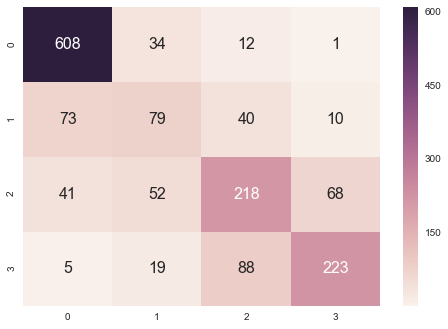

In [63]:
from sklearn.neural_network import MLPClassifier
train_eval(MLPClassifier, True)

accuracy:  0.40101845958

             precision    recall  f1-score   support

          1       0.78      0.45      0.57       655
          2       0.15      0.46      0.23       202
          3       0.36      0.42      0.39       379
          4       0.64      0.23      0.34       335

avg / total       0.57      0.40      0.44      1571

macro precision:  0.482355392398
micro precision:  0.40101845958

micro recall:  0.40101845958
macro recall:  0.393248950845

micro f1:  0.40101845958
macro f1:  0.38288434951


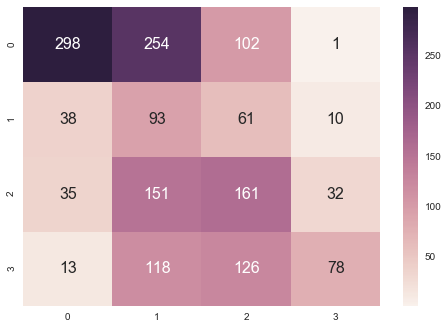

In [64]:
from sklearn.neighbors import NearestCentroid
train_eval(NearestCentroid)

C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


accuracy:  0.300445576066

             precision    recall  f1-score   support

          1       0.80      0.24      0.37       655
          2       0.13      0.35      0.19       202
          3       0.38      0.06      0.10       379
          4       0.28      0.66      0.40       335

avg / total       0.50      0.30      0.29      1571

macro precision:  0.399893848407
micro precision:  0.300445576066

micro recall:  0.300445576066
macro recall:  0.326844570802

micro f1:  0.300445576066
macro f1:  0.264242884124


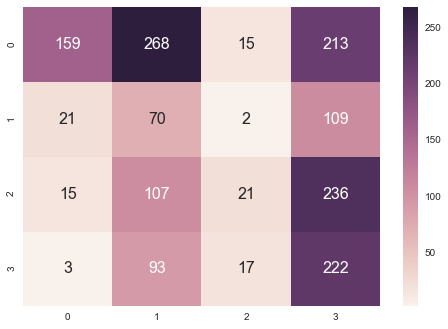

In [65]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
train_eval(QuadraticDiscriminantAnalysis)

In [66]:
#from sklearn.neighbors import RadiusNeighborsClassifier
#train_eval(RadiusNeighborsClassifier)

accuracy:  0.689369828135

             precision    recall  f1-score   support

          1       0.82      0.96      0.88       655
          2       0.28      0.18      0.22       202
          3       0.56      0.54      0.55       379
          4       0.70      0.64      0.67       335

avg / total       0.66      0.69      0.67      1571

macro precision:  0.58908433489
micro precision:  0.689369828135

micro recall:  0.689369828135
macro recall:  0.579174878878

micro f1:  0.689369828135
macro f1:  0.57937755658


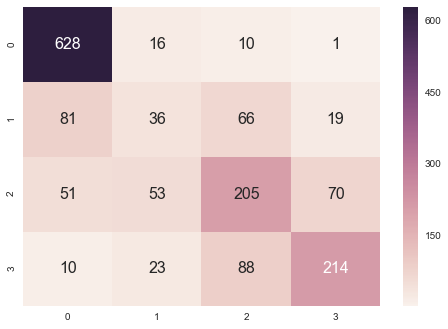

In [67]:
from sklearn.ensemble import RandomForestClassifier
train_eval(RandomForestClassifier, True)

accuracy:  0.694462126034

             precision    recall  f1-score   support

          1       0.75      0.98      0.85       655
          2       0.51      0.10      0.17       202
          3       0.63      0.42      0.51       379
          4       0.64      0.81      0.71       335

avg / total       0.67      0.69      0.65      1571

macro precision:  0.633316497903
micro precision:  0.694462126034

micro recall:  0.694462126034
macro recall:  0.577662931849

micro f1:  0.694462126034
macro f1:  0.560058568513


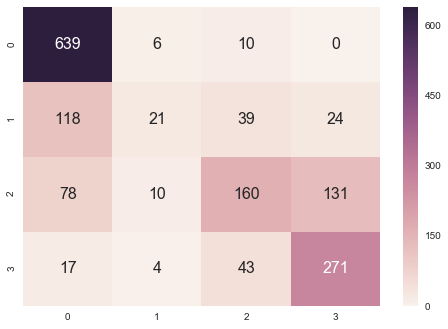

In [68]:
from sklearn.linear_model import RidgeClassifier
train_eval(RidgeClassifier, True)

accuracy:  0.694462126034

             precision    recall  f1-score   support

          1       0.75      0.98      0.85       655
          2       0.51      0.10      0.17       202
          3       0.63      0.42      0.51       379
          4       0.64      0.81      0.71       335

avg / total       0.67      0.69      0.65      1571

macro precision:  0.633316497903
micro precision:  0.694462126034

micro recall:  0.694462126034
macro recall:  0.577662931849

micro f1:  0.694462126034
macro f1:  0.560058568513


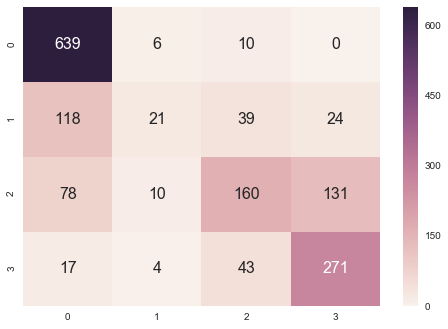

In [69]:
from sklearn.linear_model import RidgeClassifierCV
train_eval(RidgeClassifierCV)

### 1v1

accuracy:  0.653087205602

             precision    recall  f1-score   support

          1       0.82      0.92      0.86       655
          2       0.31      0.36      0.33       202
          3       0.52      0.40      0.45       379
          4       0.65      0.60      0.62       335

avg / total       0.64      0.65      0.65      1571

macro precision:  0.573790212117
micro precision:  0.653087205602

micro recall:  0.653087205602
macro recall:  0.569040027328

micro f1:  0.653087205602
macro f1:  0.568321264093


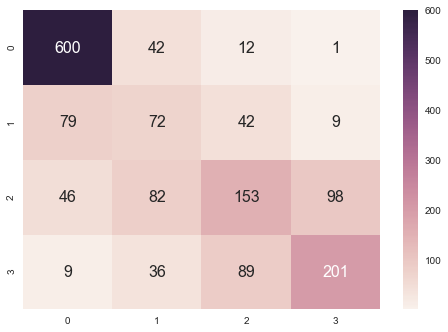

In [70]:
from sklearn.svm import NuSVC
train_eval(NuSVC, True, nu=0.1)

accuracy:  0.6683640993

             precision    recall  f1-score   support

          1       0.72      0.97      0.83       655
          2       0.67      0.01      0.02       202
          3       0.54      0.51      0.53       379
          4       0.65      0.64      0.65       335

avg / total       0.66      0.67      0.61      1571

macro precision:  0.647257979084
micro precision:  0.6683640993

micro recall:  0.6683640993
macro recall:  0.535062427438

micro f1:  0.6683640993
macro f1:  0.506751010863


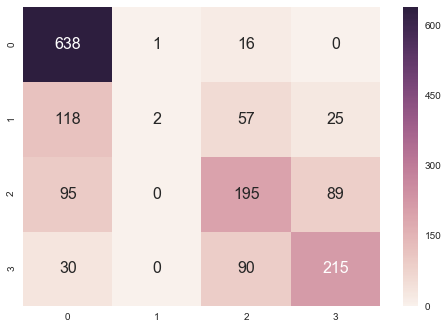

In [71]:
from sklearn.svm import SVC
train_eval(SVC, True)

accuracy:  0.573520050923

             precision    recall  f1-score   support

          1       0.58      0.97      0.72       655
          2       0.11      0.00      0.01       202
          3       0.48      0.27      0.35       379
          4       0.66      0.47      0.55       335

avg / total       0.51      0.57      0.51      1571

macro precision:  0.45776048992
micro precision:  0.573520050923

micro recall:  0.573520050923
macro recall:  0.431625694286

micro f1:  0.573520050923
macro f1:  0.408888641735


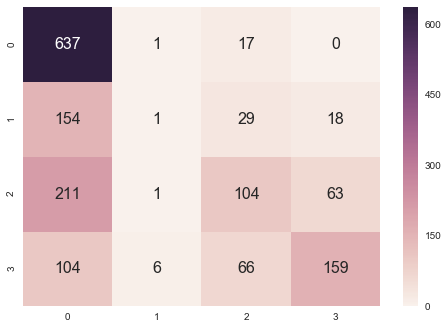

In [72]:
from sklearn.gaussian_process import GaussianProcessClassifier
train_eval(GaussianProcessClassifier, True, multi_class='one_vs_one')

### 1vAll

accuracy:  0.742202418842

             precision    recall  f1-score   support

          1       0.85      0.96      0.90       655
          2       0.51      0.39      0.44       202
          3       0.61      0.60      0.60       379
          4       0.76      0.68      0.72       335

avg / total       0.73      0.74      0.73      1571

macro precision:  0.682251394107
micro precision:  0.742202418842

micro recall:  0.742202418842
macro recall:  0.658665648874

micro f1:  0.742202418842
macro f1:  0.666925323469


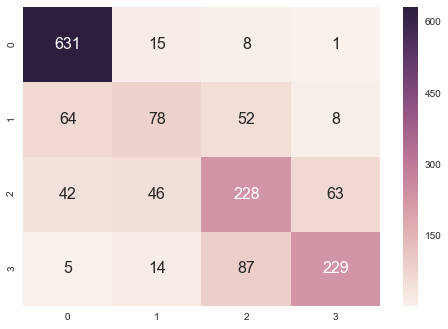

In [73]:
from sklearn.ensemble import GradientBoostingClassifier
train_eval(GradientBoostingClassifier, True)

In [74]:
#from sklearn.gaussian_process import GaussianProcessClassifier
#train_eval(GaussianProcessClassifier, True)

accuracy:  0.712285168682

             precision    recall  f1-score   support

          1       0.83      0.95      0.88       655
          2       0.49      0.18      0.27       202
          3       0.59      0.52      0.55       379
          4       0.64      0.79      0.71       335

avg / total       0.69      0.71      0.69      1571

macro precision:  0.637076061754
micro precision:  0.712285168682

micro recall:  0.712285168682
macro recall:  0.610141724163

micro f1:  0.712285168682
macro f1:  0.602906199966


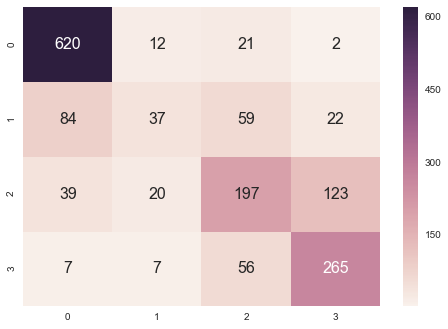

In [75]:
from sklearn.svm import LinearSVC
train_eval(LinearSVC, True, multi_class='ovr')

In [76]:
#from sklearn.linear_model import LogisticRegression
#train_eval(LogisticRegression, True, multi_class='ovr')

In [77]:
#from sklearn.linear_model import LogisticRegressionCV
#train_eval(LogisticRegressionCV, True, multi_class='ovr')

C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


accuracy:  0.639083386378

             precision    recall  f1-score   support

          1       0.65      1.00      0.79       655
          2       0.44      0.02      0.04       202
          3       0.71      0.18      0.29       379
          4       0.61      0.82      0.70       335

avg / total       0.63      0.64      0.55      1571

macro precision:  0.603200710109
micro precision:  0.639083386378

micro recall:  0.639083386378
macro recall:  0.506713107394

micro f1:  0.639083386378
macro f1:  0.453949232178


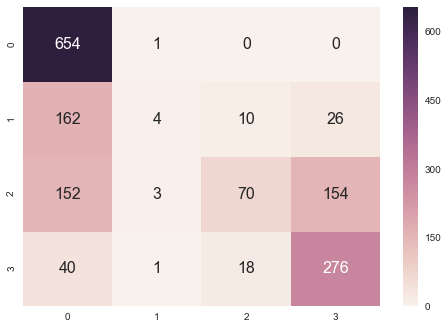

In [78]:
from sklearn.linear_model import SGDClassifier
train_eval(SGDClassifier, True)

C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


accuracy:  0.607893061744

             precision    recall  f1-score   support

          1       0.64      1.00      0.78       655
          2       0.00      0.00      0.00       202
          3       0.83      0.01      0.03       379
          4       0.54      0.88      0.67       335

avg / total       0.58      0.61      0.48      1571

macro precision:  0.504172441439
micro precision:  0.607893061744

micro recall:  0.607893061744
macro recall:  0.473447406766

micro f1:  0.607893061744
macro f1:  0.369600272326


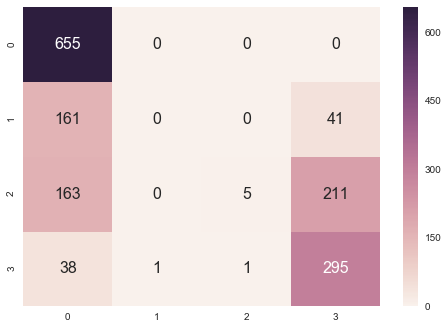

In [79]:
from sklearn.linear_model import Perceptron
train_eval(Perceptron, True)

C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.passive_aggressive.PassiveAggressiveClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


accuracy:  0.619350732018

             precision    recall  f1-score   support

          1       0.68      1.00      0.81       655
          2       0.20      0.00      0.01       202
          3       0.80      0.01      0.02       379
          4       0.52      0.93      0.67       335

avg / total       0.61      0.62      0.49      1571

macro precision:  0.550696846318
micro precision:  0.619350732018

micro recall:  0.619350732018
macro recall:  0.487458235742

micro f1:  0.619350732018
macro f1:  0.377505959682


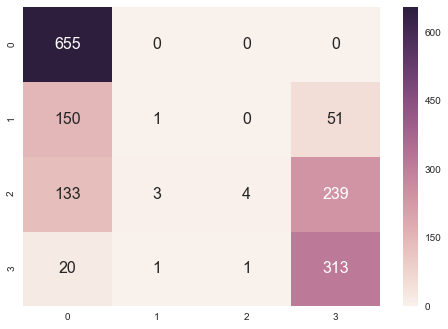

In [80]:
from sklearn.linear_model import PassiveAggressiveClassifier
train_eval(PassiveAggressiveClassifier, True)

### Results

In [81]:
df_results[['Algoritmus','Transformácia','S','P_0','P_1','P_2','P_3','Ú_0','Ú_1','Ú_2','Ú_3', 'F1_makro']] \
.sort_values(by=['Algoritmus', 'Transformácia'])

,Algoritmus,Transformácia,S,P_0,P_1,P_2,P_3,Ú_0,Ú_1,Ú_2,Ú_3,F1_makro
0,BernoulliNB,nie,0.56,0.80,0.25,0.42,0.53,0.69,0.26,0.46,0.59,0.50
23,BernoulliNB,áno,0.56,0.79,0.25,0.42,0.53,0.69,0.27,0.46,0.60,0.50
1,DecisionTreeClassifier,nie,0.66,0.86,0.33,0.50,0.66,0.86,0.35,0.49,0.64,0.59
24,DecisionTreeClassifier,áno,0.66,0.85,0.32,0.52,0.67,0.85,0.35,0.49,0.67,0.59
2,ExtraTreeClassifier,nie,0.50,0.70,0.21,0.36,0.44,0.70,0.23,0.35,0.42,0.43
25,ExtraTreeClassifier,áno,0.59,0.80,0.24,0.43,0.53,0.85,0.26,0.36,0.54,0.50
3,ExtraTreesClassifier,nie,0.62,0.71,0.24,0.50,0.62,0.93,0.13,0.40,0.56,0.50
26,ExtraTreesClassifier,áno,0.67,0.82,0.35,0.51,0.64,0.96,0.21,0.47,0.63,0.57
4,GaussianNB,nie,0.33,0.99,0.14,0.29,0.85,0.12,0.15,0.90,0.21,0.28
27,GaussianNB,áno,0.34,0.89,0.16,0.48,0.64,0.28,0.89,0.06,0.43,0.33


### Results sorted by Accuracy

In [82]:
df_results[['Algoritmus','Transformácia','S','P_0','P_1','P_2','P_3','Ú_0','Ú_1','Ú_2','Ú_3', 'F1_makro']] \
.sort_values(by=['S'], ascending=False)

,Algoritmus,Transformácia,S,P_0,P_1,P_2,P_3,Ú_0,Ú_1,Ú_2,Ú_3,F1_makro
7,LogisticRegression,nie,0.75,0.84,0.53,0.63,0.79,0.97,0.32,0.66,0.69,0.67
41,GradientBoostingClassifier,áno,0.74,0.85,0.51,0.61,0.76,0.96,0.39,0.60,0.68,0.67
31,LogisticRegressionCV,áno,0.74,0.85,0.50,0.63,0.73,0.94,0.37,0.58,0.75,0.66
18,GradientBoostingClassifier,nie,0.74,0.86,0.51,0.61,0.76,0.96,0.41,0.60,0.67,0.67
30,LogisticRegression,áno,0.73,0.83,0.51,0.61,0.70,0.95,0.31,0.56,0.75,0.65
32,MLPClassifier,áno,0.72,0.84,0.43,0.61,0.74,0.93,0.39,0.58,0.67,0.65
42,LinearSVC,áno,0.71,0.83,0.49,0.59,0.64,0.95,0.18,0.52,0.79,0.60
29,LinearDiscriminantAnalysis,áno,0.70,0.85,0.39,0.64,0.69,0.90,0.47,0.46,0.74,0.64
8,LogisticRegressionCV,nie,0.69,0.74,0.54,0.56,0.75,0.98,0.11,0.55,0.64,0.57
37,RidgeClassifierCV,áno,0.69,0.75,0.51,0.63,0.64,0.98,0.10,0.42,0.81,0.56


In [83]:
# store results
df_results[['Algoritmus','Transformácia','S','P_0','P_1','P_2','P_3','Ú_0','Ú_1','Ú_2','Ú_3', 'F1_makro']]\
.sort_values(by=['Algoritmus', 'Transformácia']).to_csv('results/meta_dynamic_lsa_lda.csv')

In [84]:
df_results.describe()

,F1_makro,P_0,P_1,P_2,P_3,S,Ú_0,Ú_1,Ú_2,Ú_3
count,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000
mean,0.468261,0.760652,0.277174,0.475000,0.623478,0.575870,0.790000,0.234130,0.391739,0.573913
std,0.150500,0.131933,0.178633,0.179304,0.182321,0.147129,0.290448,0.237052,0.231635,0.232470
min,0.120000,0.420000,0.000000,0.000000,0.000000,0.160000,0.010000,0.000000,0.000000,0.000000
25%,0.382500,0.685000,0.142500,0.380000,0.545000,0.505000,0.730000,0.030000,0.255000,0.495000
50%,0.500000,0.800000,0.260000,0.510000,0.655000,0.620000,0.930000,0.210000,0.440000,0.635000
75%,0.577500,0.850000,0.437500,0.605000,0.700000,0.687500,0.960000,0.350000,0.535000,0.700000
max,0.670000,0.990000,0.670000,0.830000,1.000000,0.750000,1.000000,1.000000,0.900000,0.930000
